<h1 style="font-size:3rem;color:orange;"> VL Jupyter Notebook</h1>

In [24]:
#Import Pandas
import pandas

In [25]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier,
    BaggingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import GridSearchCV
!pip install shap

In [26]:
# Loading the dataset
file_path = 'C:/Users/mnzilani/VL Machine Learning/Turkana_LagsF (1).xlsx'
lags = pd.read_excel(file_path, sheet_name=None)

In [27]:
# View sheet names
print("Sheet Names:", lags.keys())

Sheet Names: dict_keys(['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8'])


In [28]:
#Looking at the data types
lags["L2"].dtypes

villages                                          object
lat                                              float64
lon                                              float64
SUB_COUNTY                                        object
HOSPITAL                                          object
HOSPITAL_LAT                                     float64
HOSPITAL_LONG                                    float64
OUT_PATIENT                                       object
INDEX                                              int64
Village.ID                                         int64
VILLAGE.GEO.CORRDINATES.COUNTY.COUNTRY            object
SUB_COUNTY_OF_PATIENT                             object
SEX                                               object
AGE                                              float64
DATE_SEEN                                 datetime64[ns]
RDT_rk39                                          object
Infections                                         int64
forest_height                  

In [29]:
# Correlation matrix
selected_columns = ['AGE', 'Infections', 'forest_height','population_density','Distance_to_Water_.km.','Elevation','LULC','tempmax','tempmin','mean_temp','mean_humidity','total_precip','soil_type','Brightness','Wetness','Greenness']
selected_data = lags["L1"][selected_columns]
# Compute the correlation matrix
correlation_matrix = selected_data.corr()
print(correlation_matrix)

                             AGE  Infections  forest_height  \
AGE                     1.000000   -0.126183      -0.016148   
Infections             -0.126183    1.000000      -0.001697   
forest_height          -0.016148   -0.001697       1.000000   
population_density     -0.016639   -0.056753      -0.057735   
Distance_to_Water_.km.  0.001925   -0.110625       0.077888   
Elevation              -0.007903   -0.129642       0.095811   
LULC                   -0.017490    0.171706      -0.058419   
tempmax                -0.013763    0.104570      -0.100080   
tempmin                -0.012790    0.113587      -0.098442   
mean_temp              -0.013525    0.110600      -0.100945   
mean_humidity           0.038515    0.008898      -0.008952   
total_precip           -0.009613   -0.085791      -0.000583   
soil_type               0.033599   -0.102569       0.095720   
Brightness              0.037324   -0.044178       0.055210   
Wetness                -0.010958    0.060540      -0.03

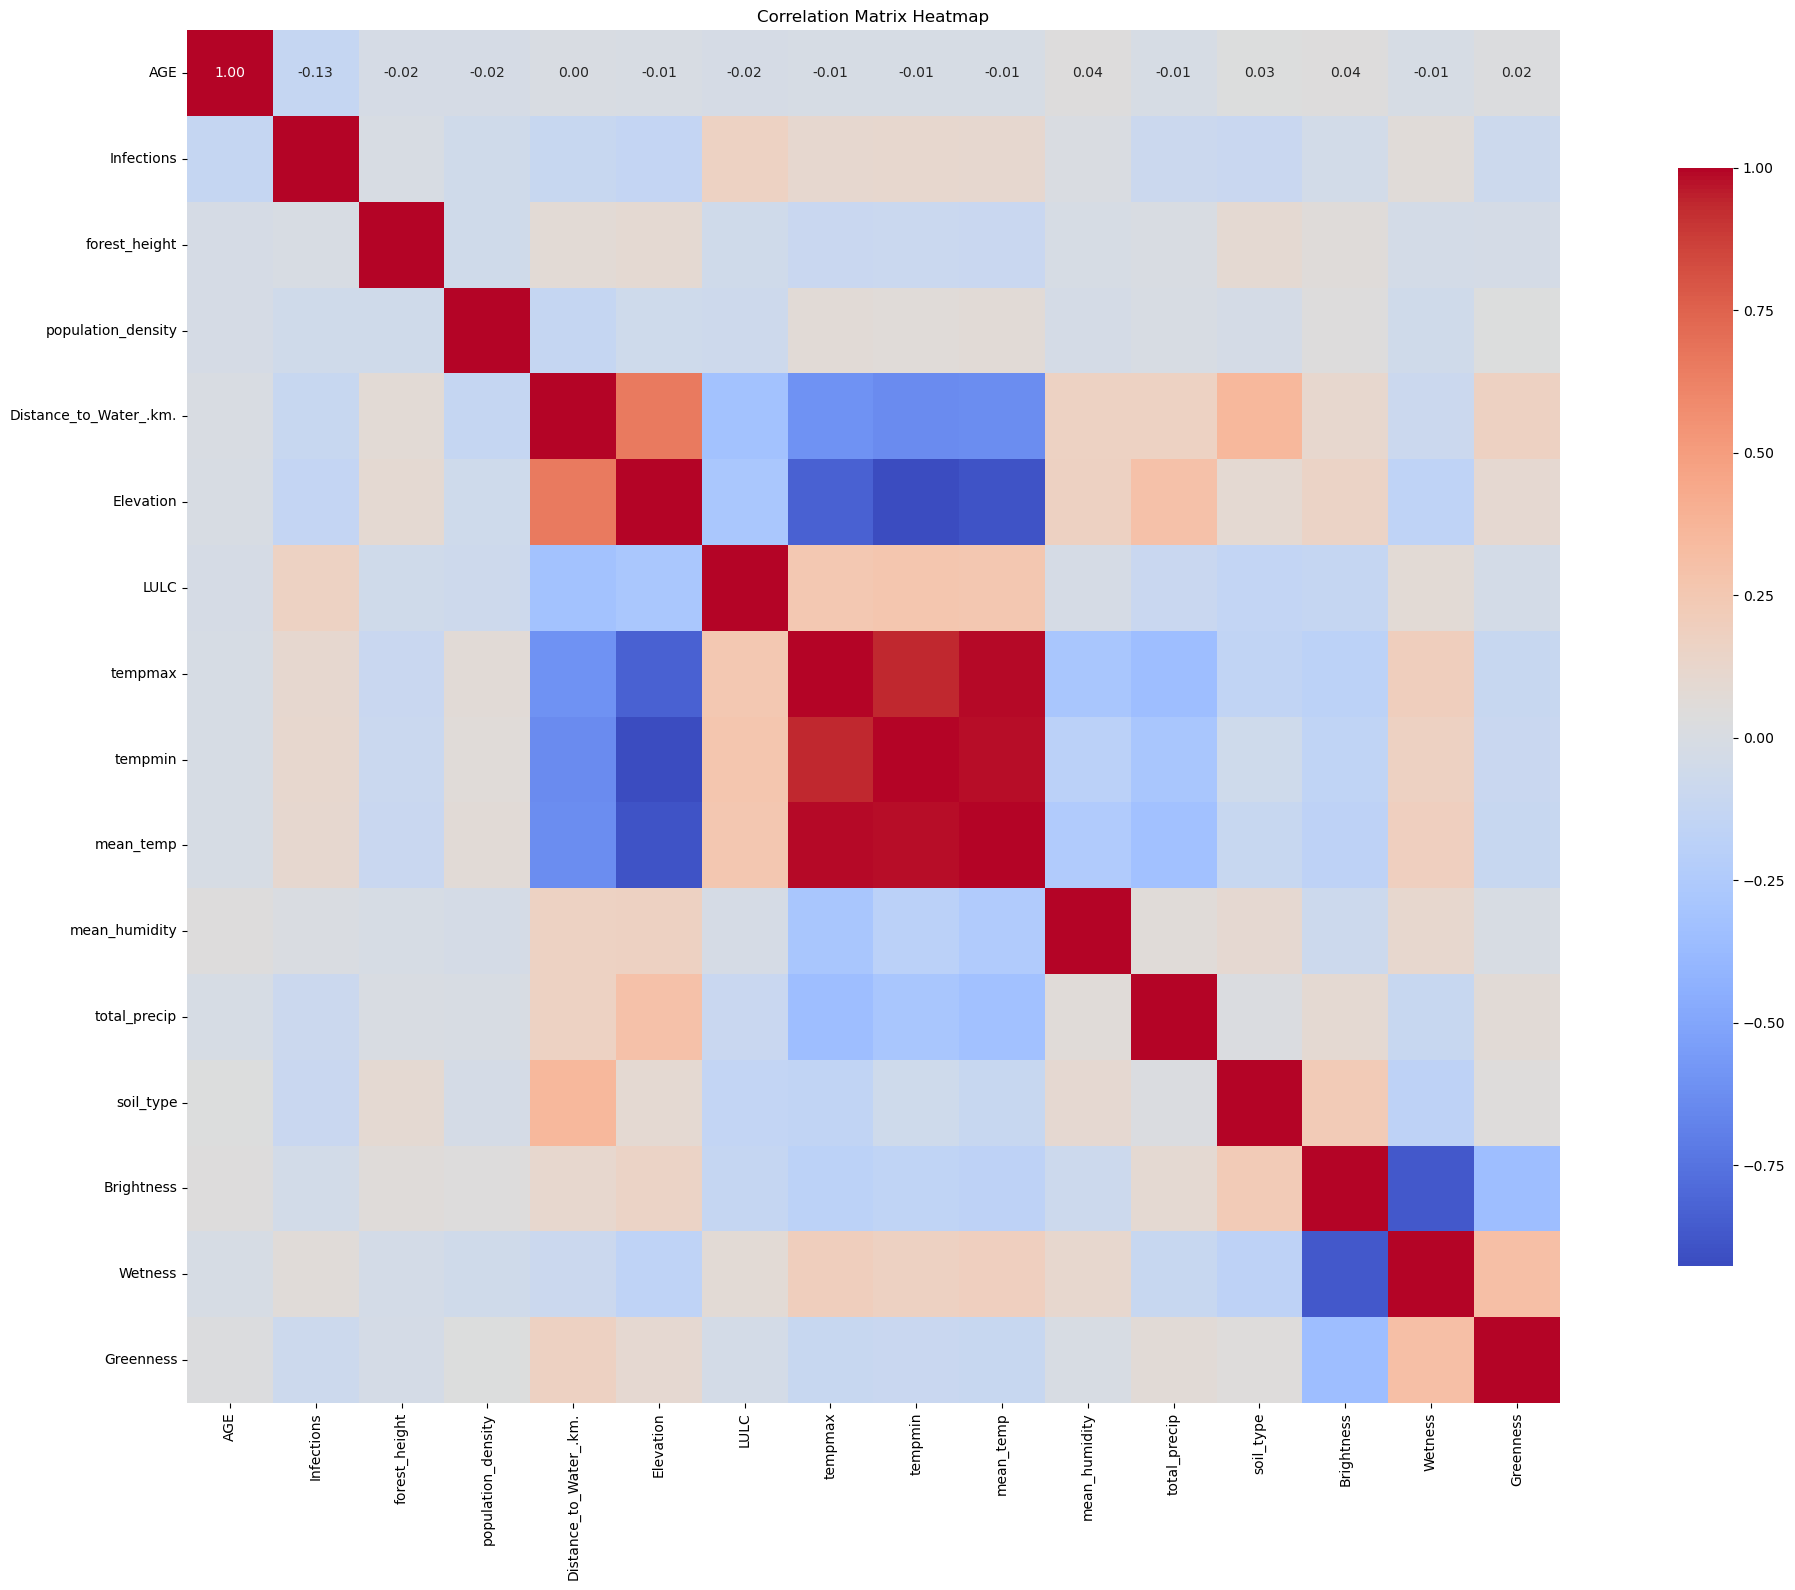

In [30]:

plt.figure(figsize=(24, 16))
# Create the heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar_kws={"shrink": 0.8},
)

plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()



In [31]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(kernel="linear", probability=True),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Extra Trees": ExtraTreesClassifier(),
    "Bagging": BaggingClassifier(DecisionTreeClassifier()),
}

In [32]:
X = lags["L1"][
    [
        "SEX",
        "AGE",
        "distance",
        "population_density",
        "Distance_to_Water_.km.",
        "Elevation",
        "LULC",
        "tempmax",
        "tempmin",
        "mean_temp",
        "mean_humidity",
        "total_precip",
        "forest_height",
        "soil_type",
        "Brightness",
        "Greenness",
        "Wetness",
    ]  
]
y = lags["L1"]["Infections"]

In [33]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    auc = roc_auc_score(y_test, y_prob)

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    return accuracy, precision, recall, f1, auc, fpr, tpr

In [34]:

features = [
    "SEX",
    "AGE",
    "distance",
    "population_density",
    "Distance_to_Water_.km.",
    "Elevation",
    "LULC",
    "tempmax",
    "tempmin",
    "mean_temp",
    "mean_humidity",
    "total_precip",
    "forest_height",
    "soil_type",
    "Greenness",
    "Brightness",
    "Wetness",
] 

# Initialize an empty list to store metrics
metrics_data = []

In [35]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the scaler
scaler = StandardScaler()

# Loop through each lag and fit models
for lag_name, lag_data in lags.items():
    # Separate features and target variable
    X = lag_data[features]
    y = lag_data["Infections"]

    # One-hot encode categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)  # Converts categorical data into numerical

    # Scale the numerical data
    X_scaled = scaler.fit_transform(X_encoded)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Loop through models and fit them
    for model_name, model_pipeline in models.items():
        model_pipeline.fit(X_train, y_train)

        # Evaluate the model
        accuracy, precision, recall, f1, auc, fpr, tpr = evaluate_model(
            model_pipeline, X_test, y_test
        )

        # Append metrics data
        metrics_data.append(
            {
                "Lag": lag_name,
                "Model": model_name,
                "Accuracy": accuracy,
                "Precision": precision,
                "Recall": recall,
                "F1-Score": f1,
                "AUC": auc,
                "fpr": fpr,
                "tpr": tpr,
            }
        )


Performance Evaluation

In [36]:
# Convert the metrics list into a DataFrame
metrics_df = pd.DataFrame(metrics_data)
performance_metrics = ["Precision", "Accuracy", "Recall", "F1-Score", "AUC"]

In [37]:
# Determine the best lag for each metric
best_lag_accuracy = metrics_df.loc[metrics_df["Accuracy"].idxmax()]["Lag"]
best_lag_precision = metrics_df.loc[metrics_df["Precision"].idxmax()]["Lag"]
best_lag_recall = metrics_df.loc[metrics_df["Recall"].idxmax()]["Lag"]
best_lag_f1 = metrics_df.loc[metrics_df["F1-Score"].idxmax()]["Lag"]
best_lag_auc = metrics_df.loc[metrics_df["AUC"].idxmax()]["Lag"]

In [38]:
# Determine the best model for each metric
best_model_accuracy = metrics_df.loc[metrics_df["Accuracy"].idxmax()]["Model"]
best_model_precision = metrics_df.loc[metrics_df["Precision"].idxmax()]["Model"]
best_model_recall = metrics_df.loc[metrics_df["Recall"].idxmax()]["Model"]
best_model_f1 = metrics_df.loc[metrics_df["F1-Score"].idxmax()]["Model"]
best_model_auc = metrics_df.loc[metrics_df["AUC"].idxmax()]["Model"]

In [39]:
def plot_best_lag_and_model_performance(df, metric):
    # Determine the best lag by averaging the metrics
    best_lag = df.groupby("Lag")[metric].mean().idxmax()
    best_lag_df = df[df["Lag"] == best_lag]

    # Determine the best model by averaging the metrics
    best_model = df.groupby("Model")[metric].mean().idxmax()
    best_model_df = df[df["Model"] == best_model]

    # Create a figure with 1 row and 2 columns of subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Plot for the best lag
    ax1 = sns.barplot(
        x="Model", y=metric, data=best_lag_df, palette="Set2", ax=axes[0], hue="Model"
    )
    ax1.set_title(f"{metric} by Model for The Best Lag ({best_lag})")

    # Annotate the bars
    for p in ax1.patches:
        ax1.annotate(
            f"{p.get_height():.1%}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    # Plot for the best model
    ax2 = sns.barplot(
        x="Lag", y=metric, data=best_model_df, palette="Set2", ax=axes[1], hue="Lag"
    )
    ax2.set_title(f"{metric} by Lag for The Best Model ({best_model})")

    # Annotate bars
    for p in ax2.patches:
        ax2.annotate(
            f"{p.get_height():.1%}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 10),
            textcoords="offset points",
        )

    plt.tight_layout()
    plt.show()

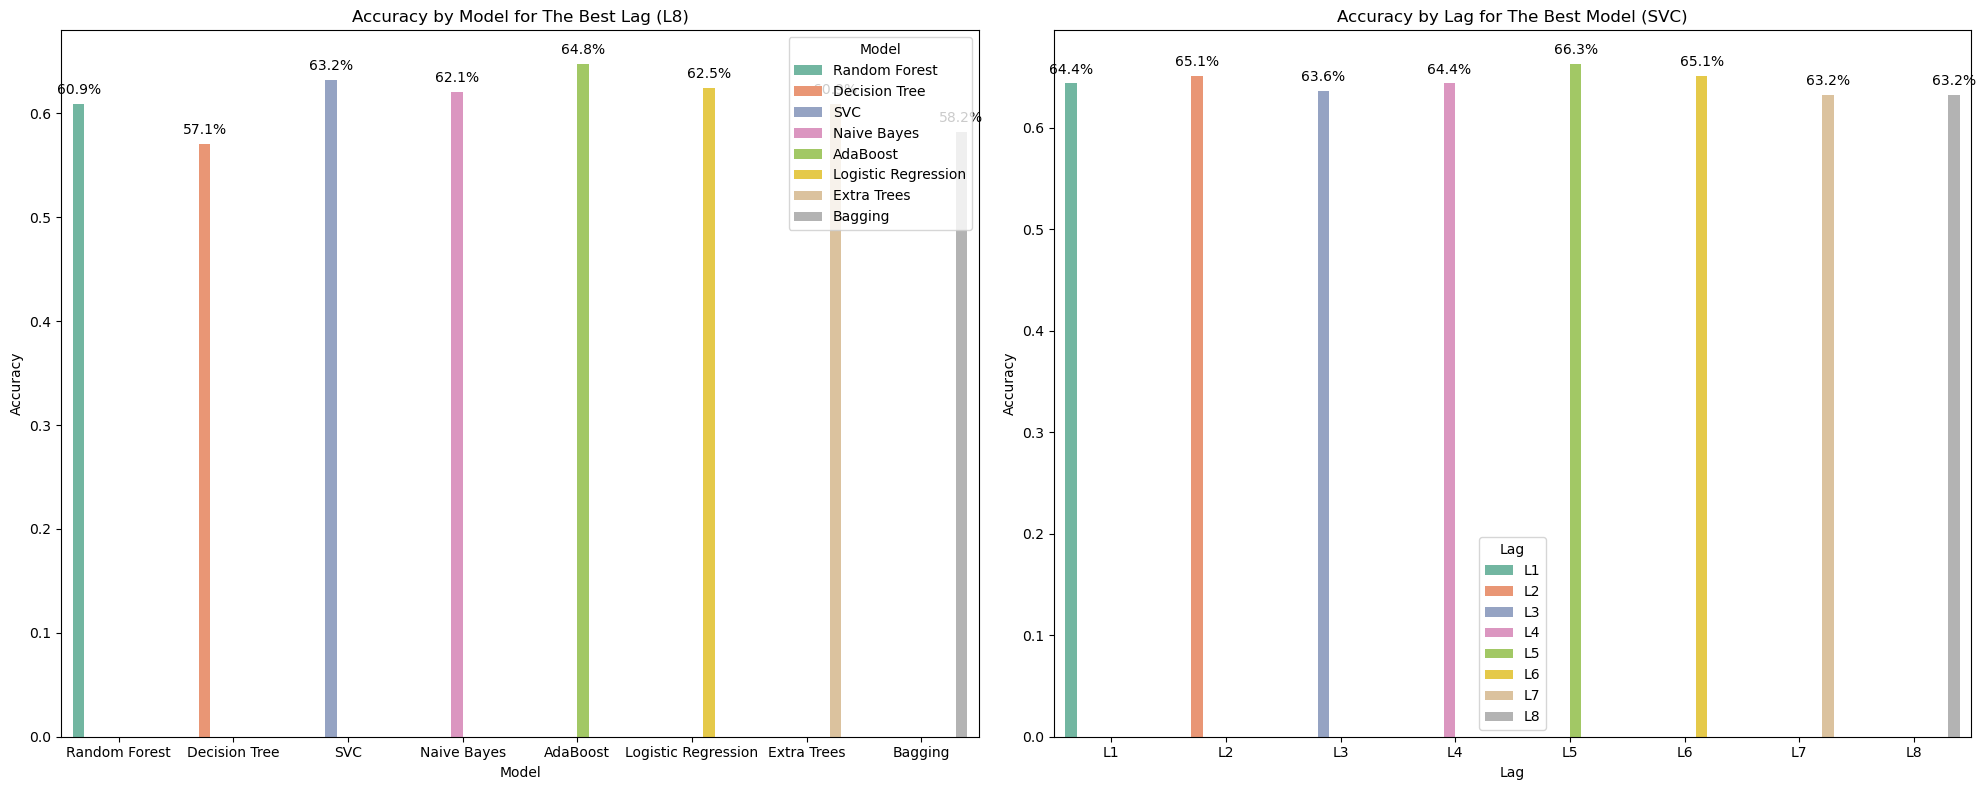

In [40]:
# Accuracy
plot_best_lag_and_model_performance(metrics_df, "Accuracy")

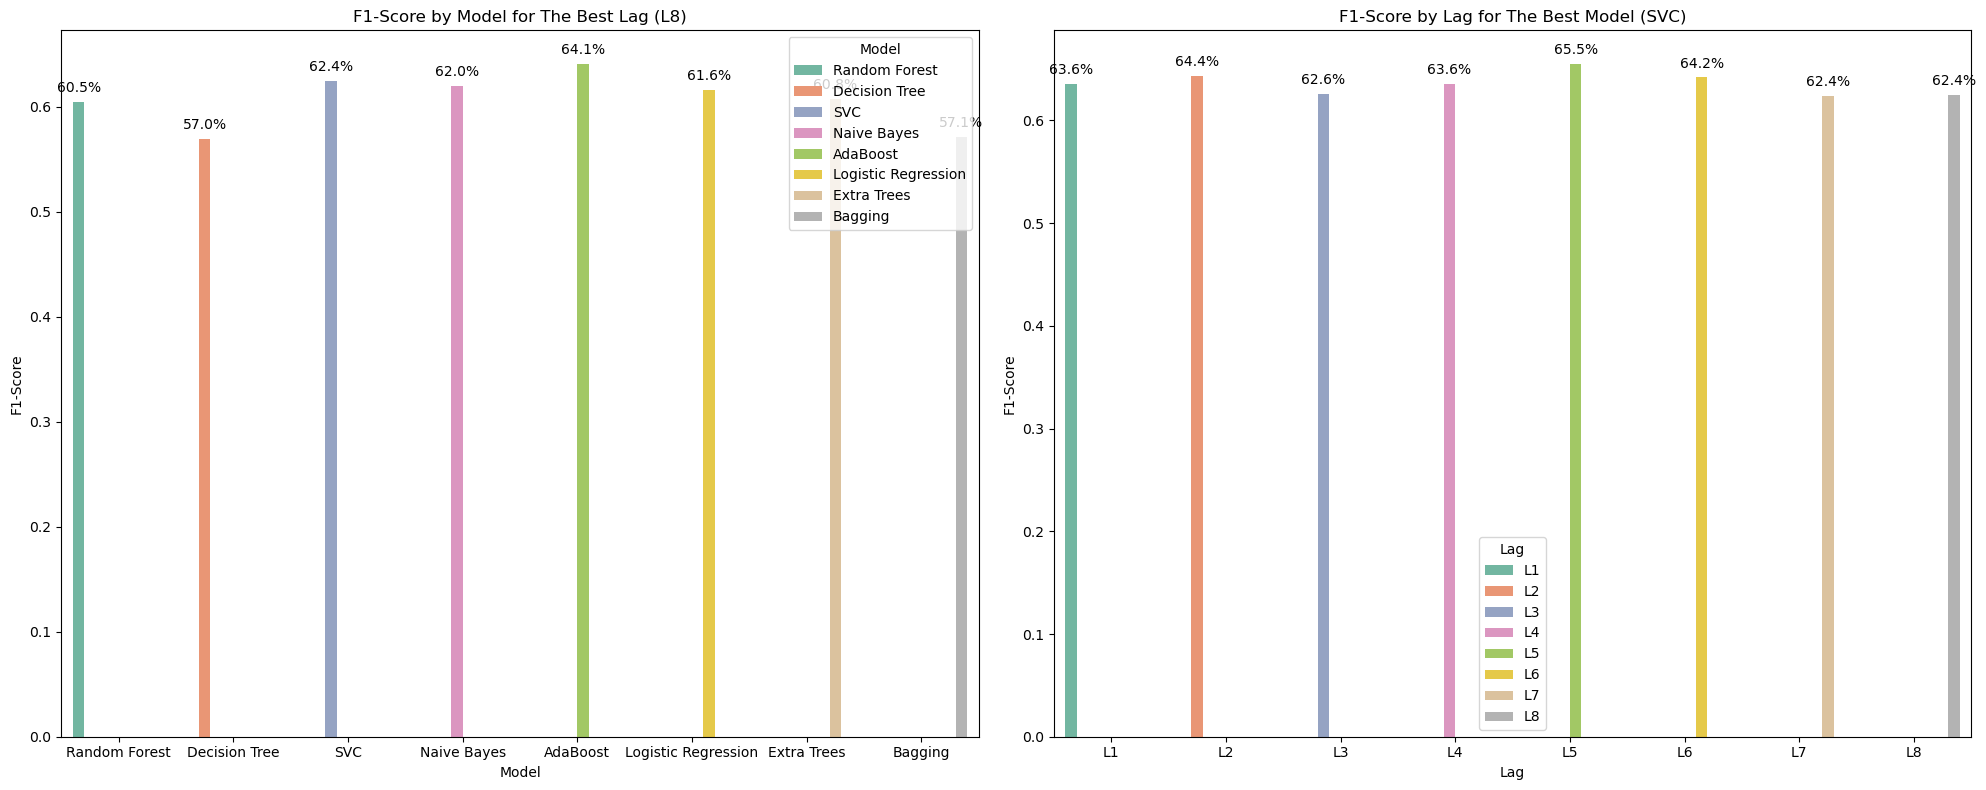

In [41]:
## F1-Score

plot_best_lag_and_model_performance(metrics_df, "F1-Score")

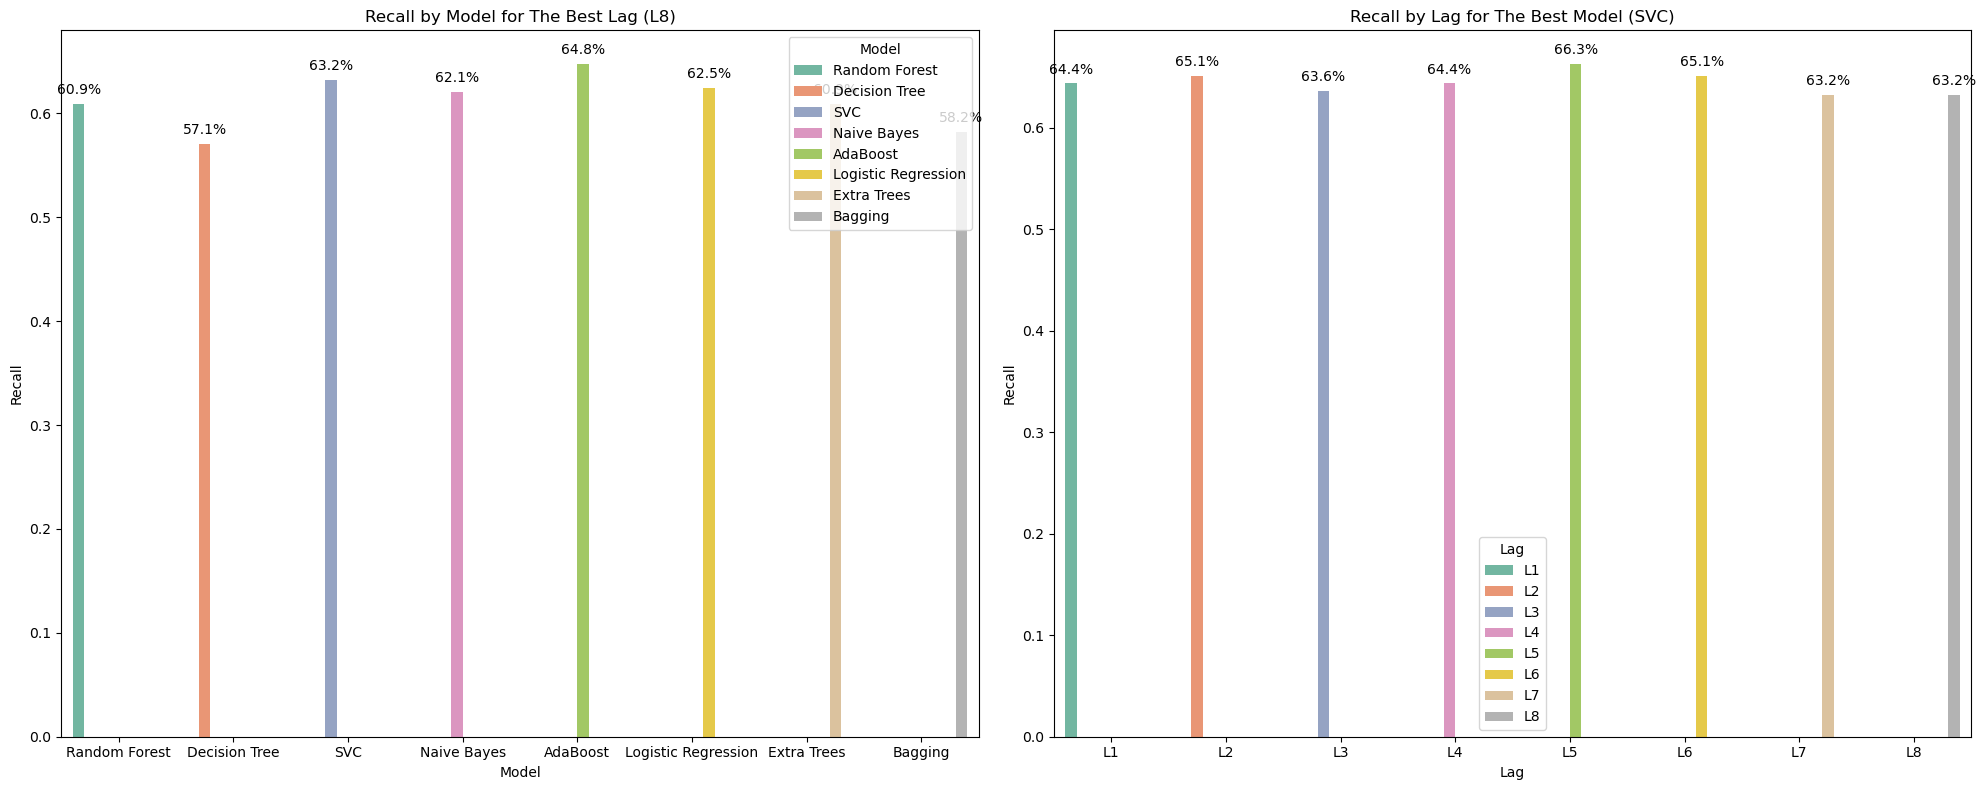

In [42]:
# Recall
plot_best_lag_and_model_performance(metrics_df, "Recall")

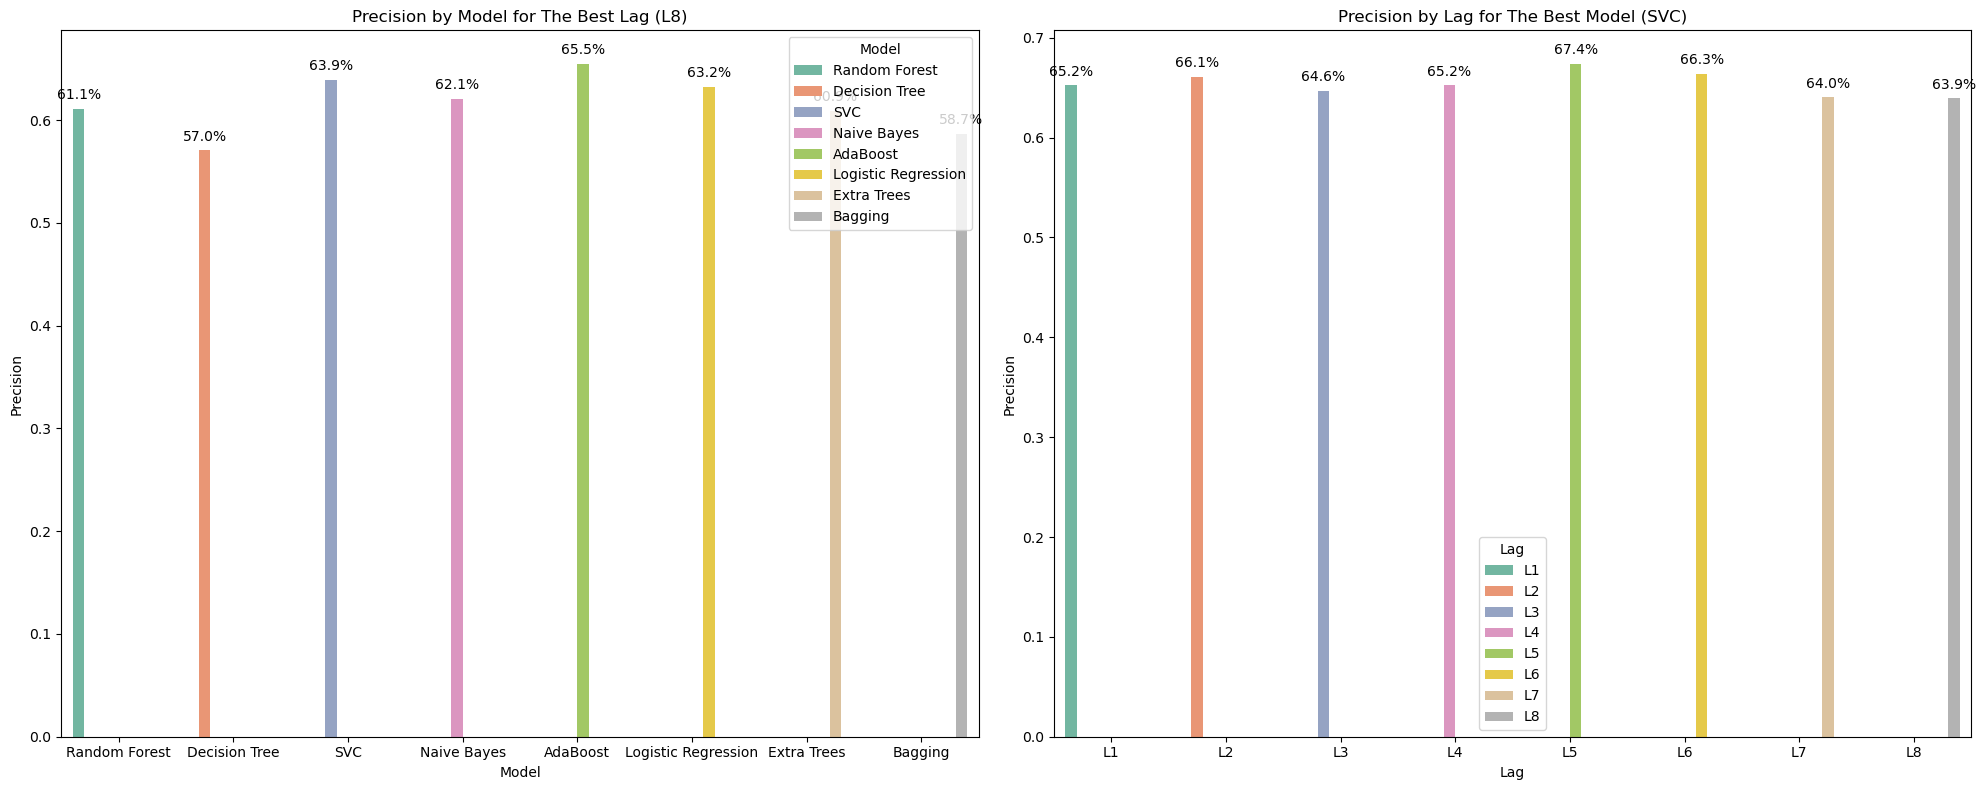

In [43]:
# Precision
plot_best_lag_and_model_performance(metrics_df, "Precision")

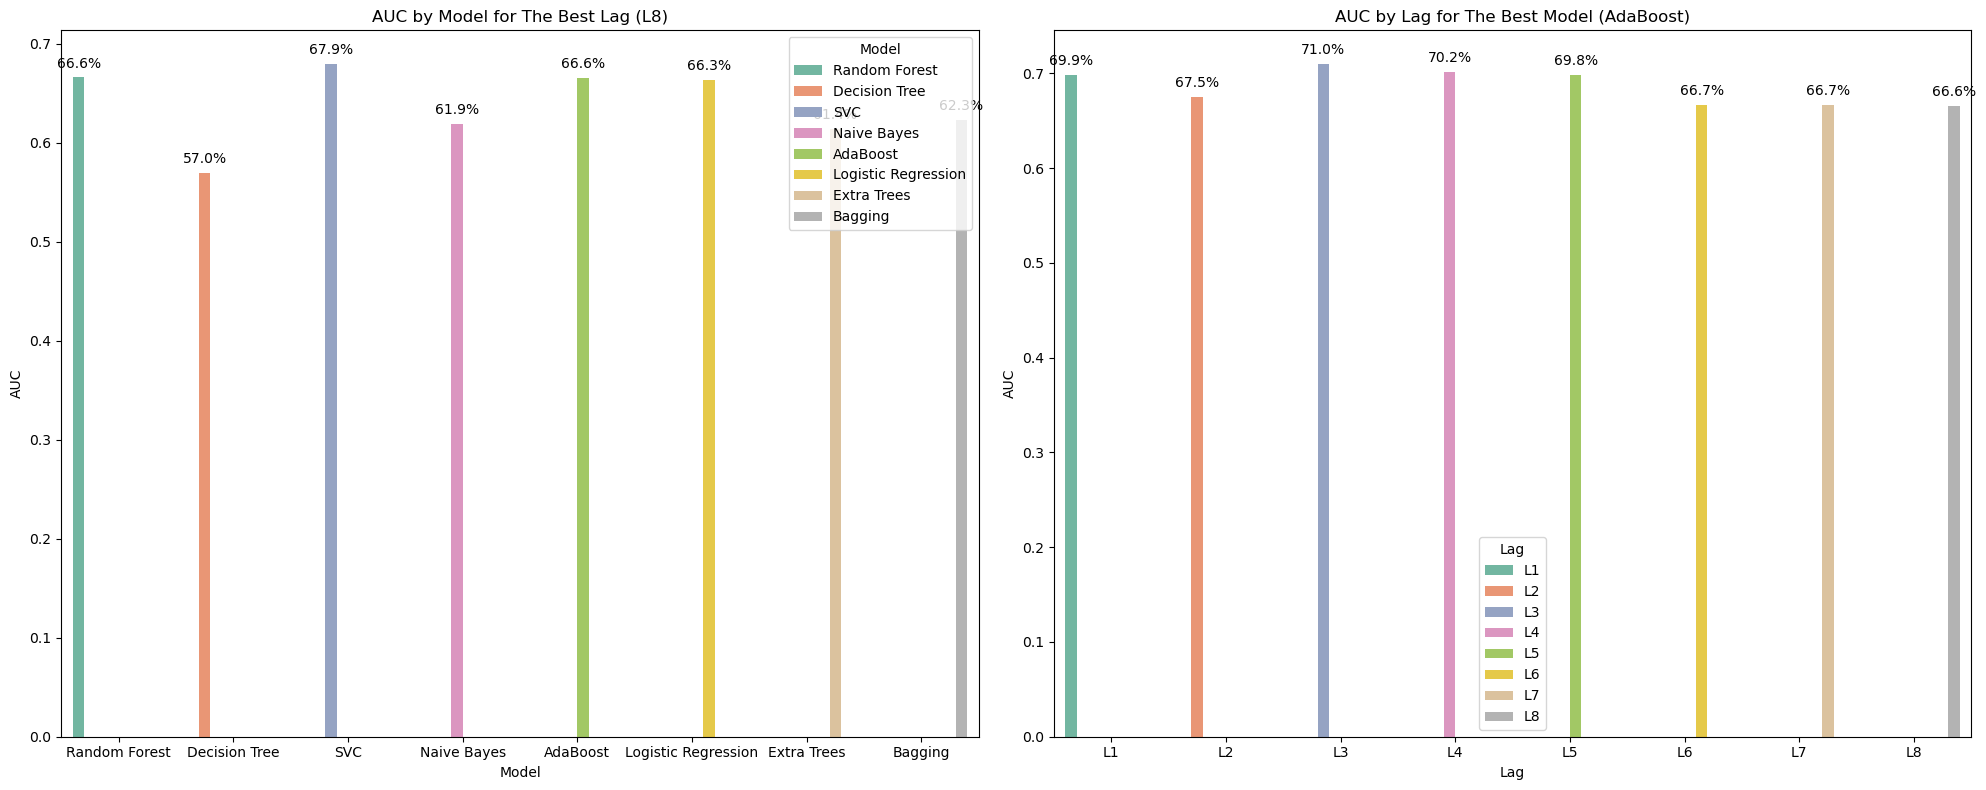

In [44]:
# AUC
plot_best_lag_and_model_performance(metrics_df, "AUC")

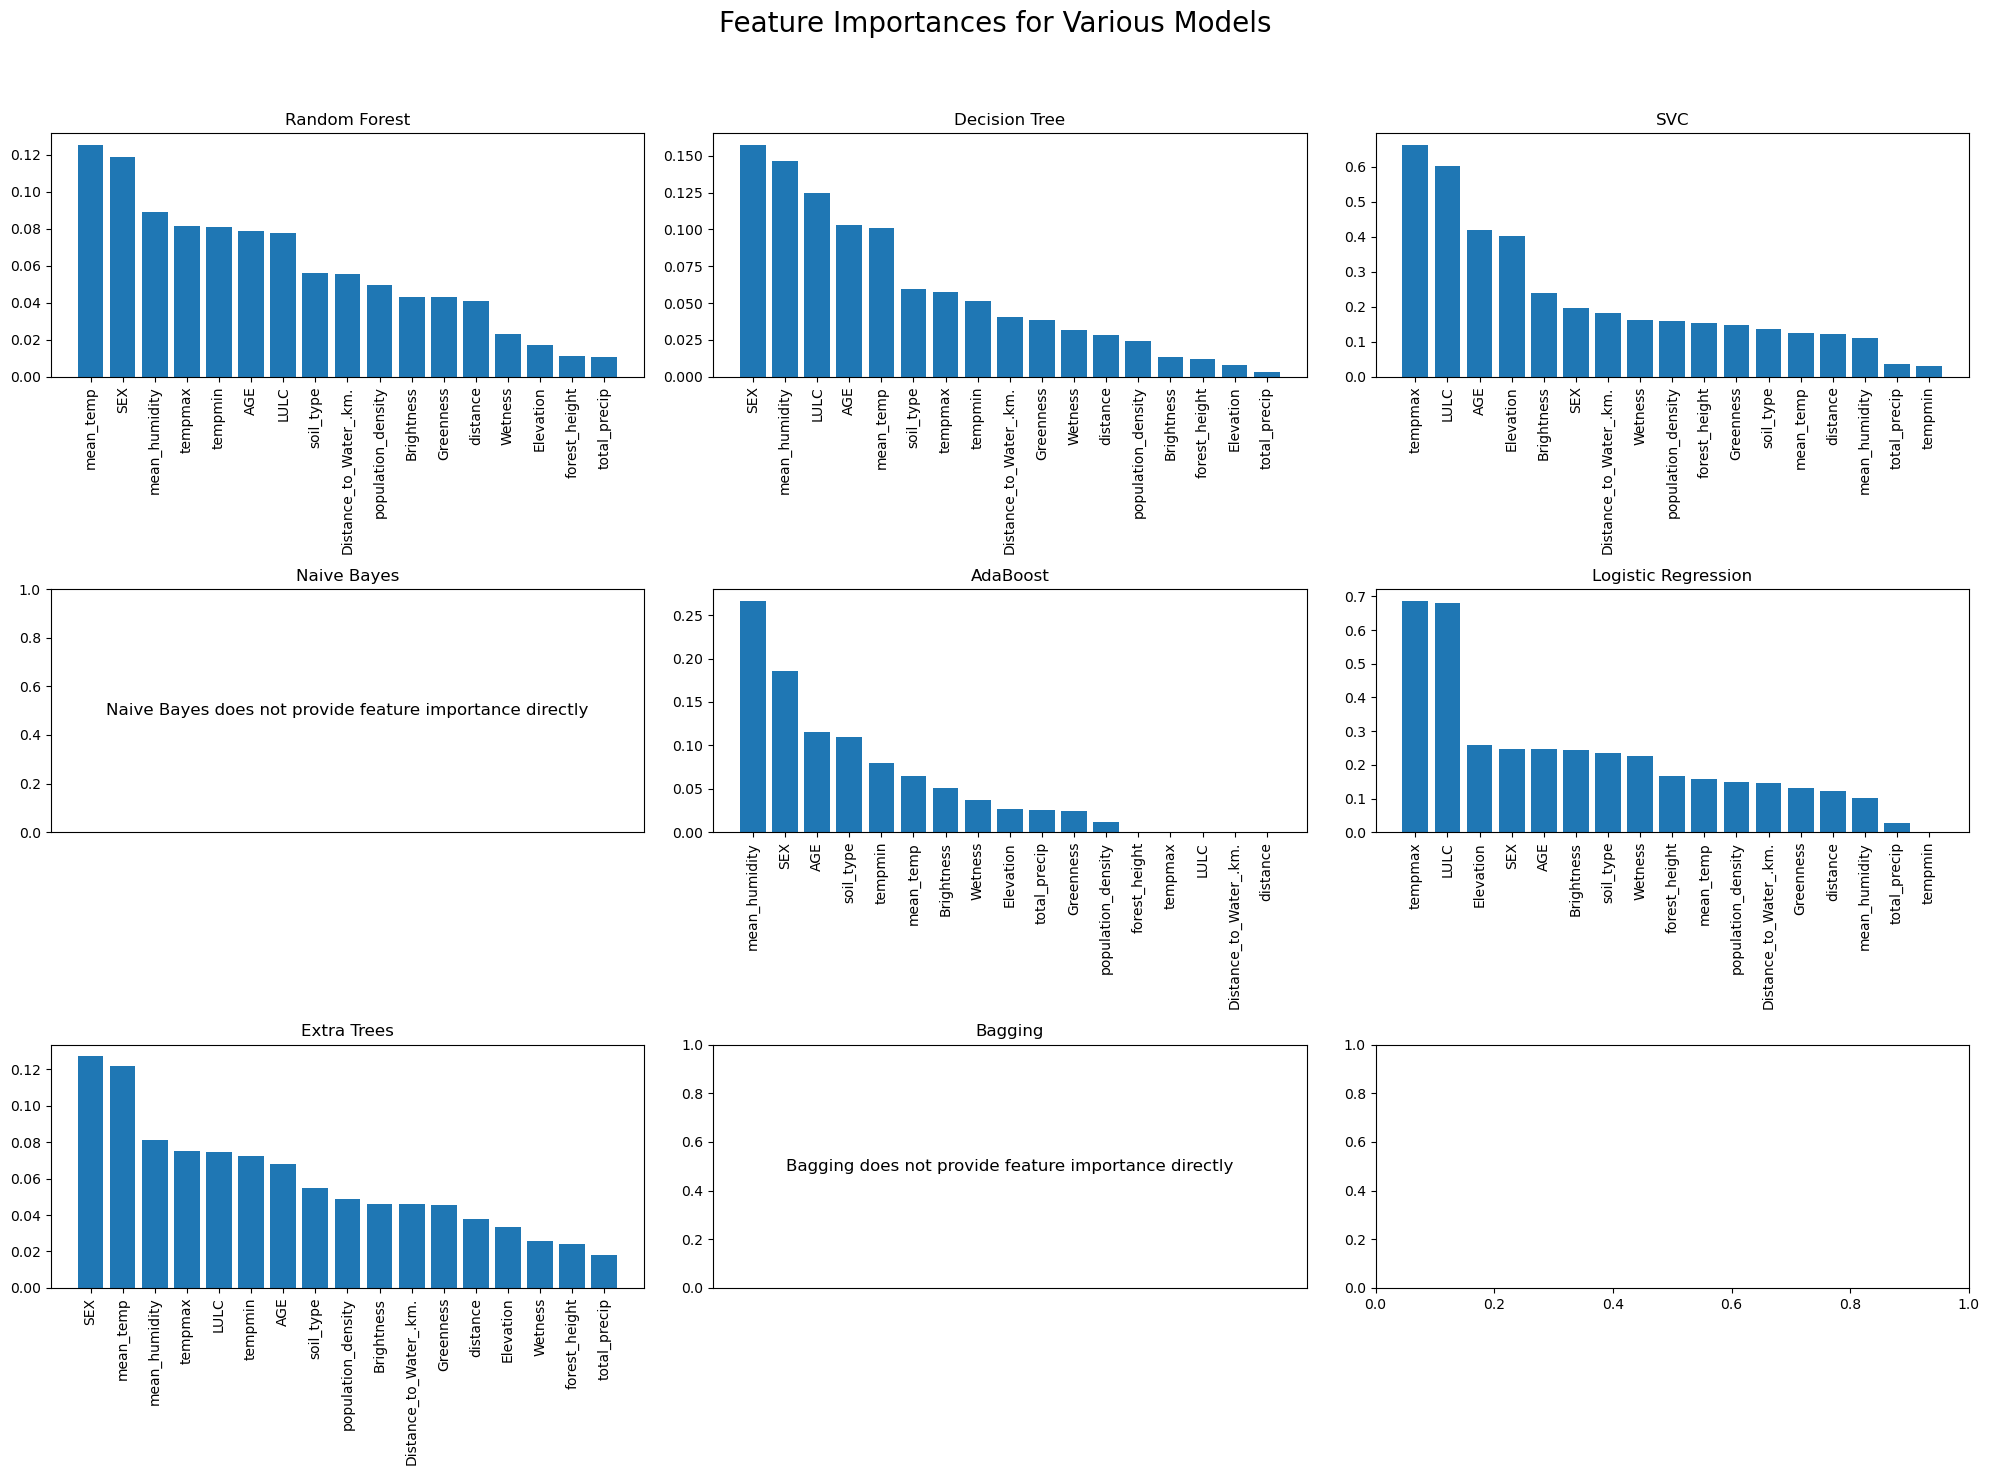

In [45]:
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle("Feature Importances for Various Models", fontsize=20)

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Iterate over each model and plot feature importance or coefficients in the subplots
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)

    ax = axs[i]
    ax.set_title(name)

    # Random Forest, Decision Tree, Extra Trees, AdaBoost, Bagging - Feature importance
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        ax.bar(range(X.shape[1]), importances[indices], align="center")
        ax.set_xticks(range(X.shape[1]))
        ax.set_xticklabels(X.columns[indices], rotation=90)

    # Logistic Regression - Coefficients as feature importance
    elif isinstance(model, LogisticRegression):
        importances = np.abs(model.coef_[0])
        indices = np.argsort(importances)[::-1]
        ax.bar(range(X.shape[1]), importances[indices], align="center")
        ax.set_xticks(range(X.shape[1]))
        ax.set_xticklabels(X.columns[indices], rotation=90)

    # SVC (with linear kernel) - Coefficients as feature importance
    elif isinstance(model, SVC):
        importances = np.abs(model.coef_[0])
        indices = np.argsort(importances)[::-1]
        ax.bar(range(X.shape[1]), importances[indices], align="center")
        ax.set_xticks(range(X.shape[1]))
        ax.set_xticklabels(X.columns[indices], rotation=90)

    # For models without feature importance (e.g., Naive Bayes, QDA)
    else:
        ax.text(
            0.5,
            0.5,
            f"{name} does not provide feature importance directly",
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=12,
        )
        ax.set_xticks([])

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

SHAP Analysis for the best Algorithm Support Vector Machine Classifer

C:\Users\mnzilani\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


SHAP Summary Plot for SVC with LinearExplainer


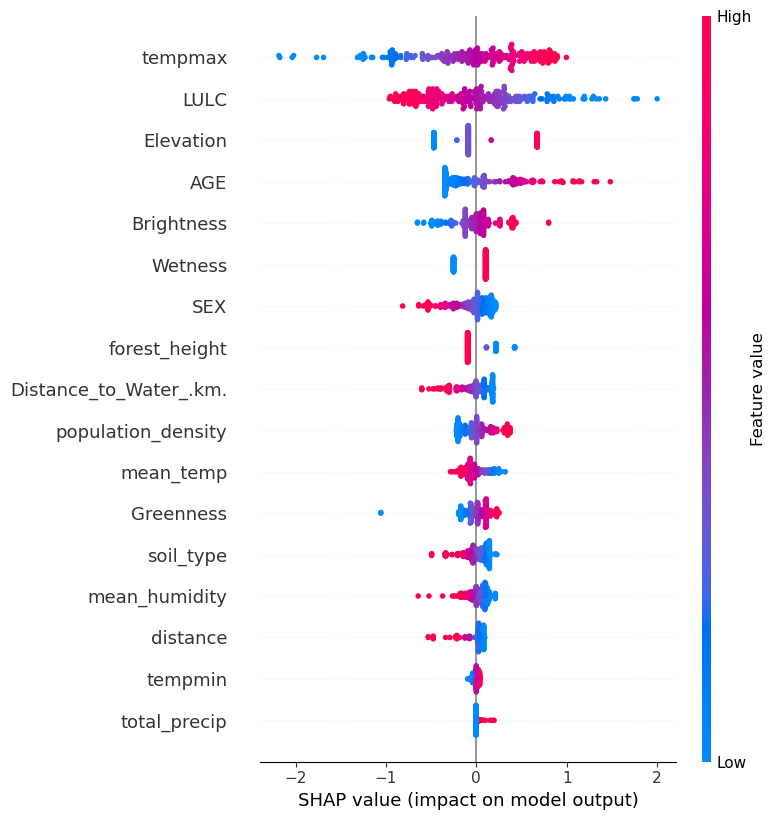

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [47]:
import os
import shap
import matplotlib.pyplot as plt

# Fix for KMeans memory leak on Windows
os.environ["OMP_NUM_THREADS"] = str(os.cpu_count() // 2)

# Reduce the background samples using shap.kmeans
background = shap.kmeans(X_train, 100)  

# Ensure the SVC model is defined with a linear kernel and probability=True
svc_model = SVC(kernel="linear", probability=True)
svc_model.fit(X_train, y_train)

# Use SHAP LinearExplainer for the linear SVC
explainer = shap.LinearExplainer(svc_model, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# If SHAP values are returned as a list (multi-class), handle only the first class
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Plot SHAP summary
print("SHAP Summary Plot for SVC with LinearExplainer")
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
plt.show()

# Optional: Visualize individual SHAP explanations
shap.force_plot(explainer.expected_value, shap_values[0, :], X_test.iloc[0, :], matplotlib=True)
